#### Introduction :
This project aims to classify diabetes outcomes utilizing machine learning techniques. First of all, we will import necessary libraries :

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Processing: Preparing Diabet outcomes Dataset for Classification 

Reading the diabetes dataset into a DataFrame and displays the first 10 rows.

In [5]:
df= pd.read_csv('diabetes.csv')
df.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Providing an overview of the dataset structure and data types.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Outcome'].value_counts() 

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Analyzing Feature Interconnections

Visualizing Diabetes Outcome: Count Plot of Positive and Negative Cases in the Diabetes Dataset

<Axes: xlabel='Outcome', ylabel='count'>

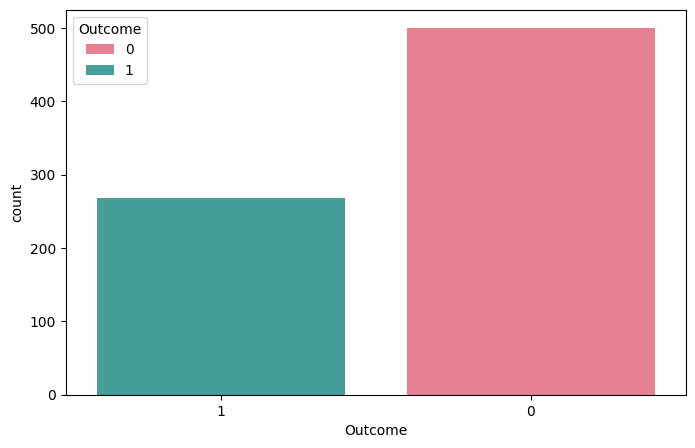

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df, order=[1, 0], hue='Outcome', palette='husl')

Pairwise Scatterplot of Chosen Features Highlighting Diabetes Outcomes

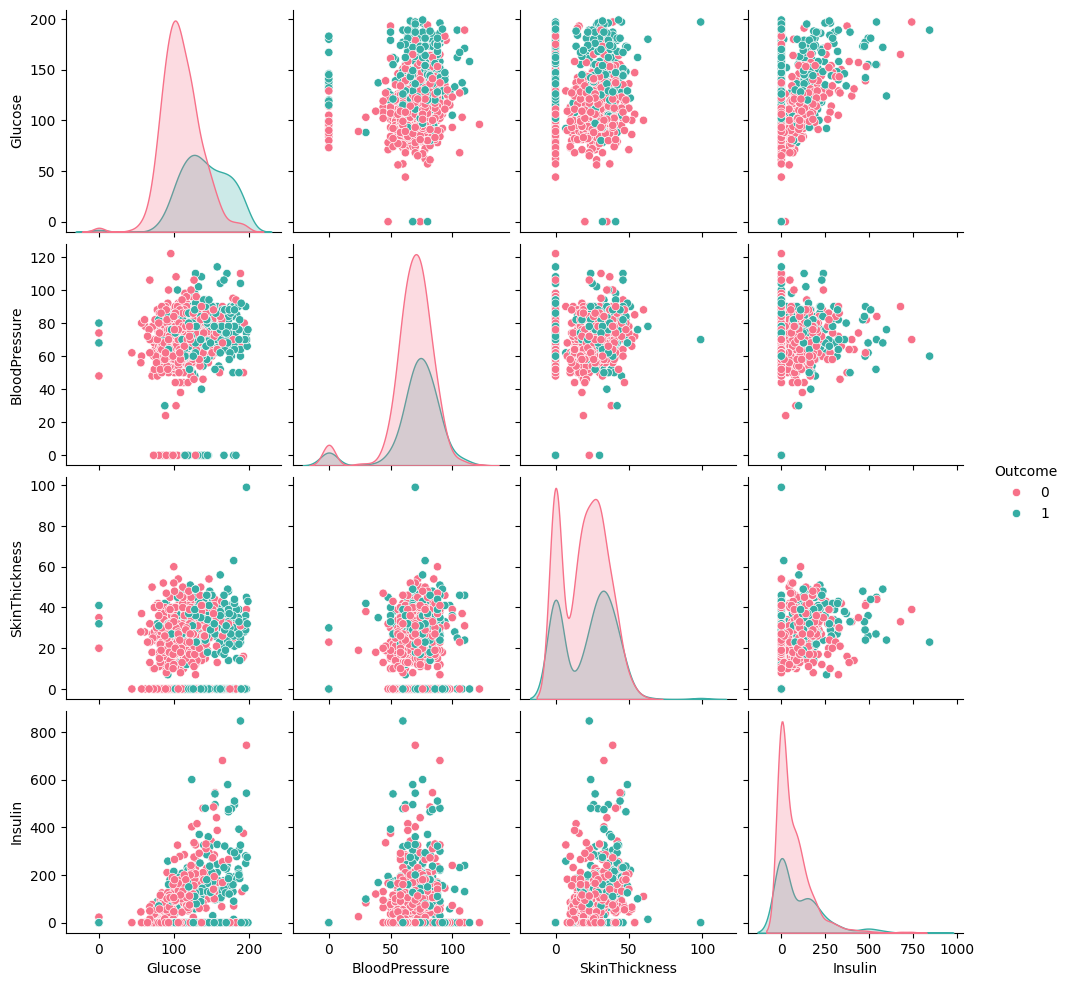

In [12]:
cols_to_plot = df.columns[1:5].tolist() + ['Outcome']
sns.pairplot(df[cols_to_plot], hue="Outcome", palette='husl')

Analyzing Feature Correlation

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Heatmap of Pearson Correlation Coefficients for Selected Features in the Diabetes Dataset

<Axes: >

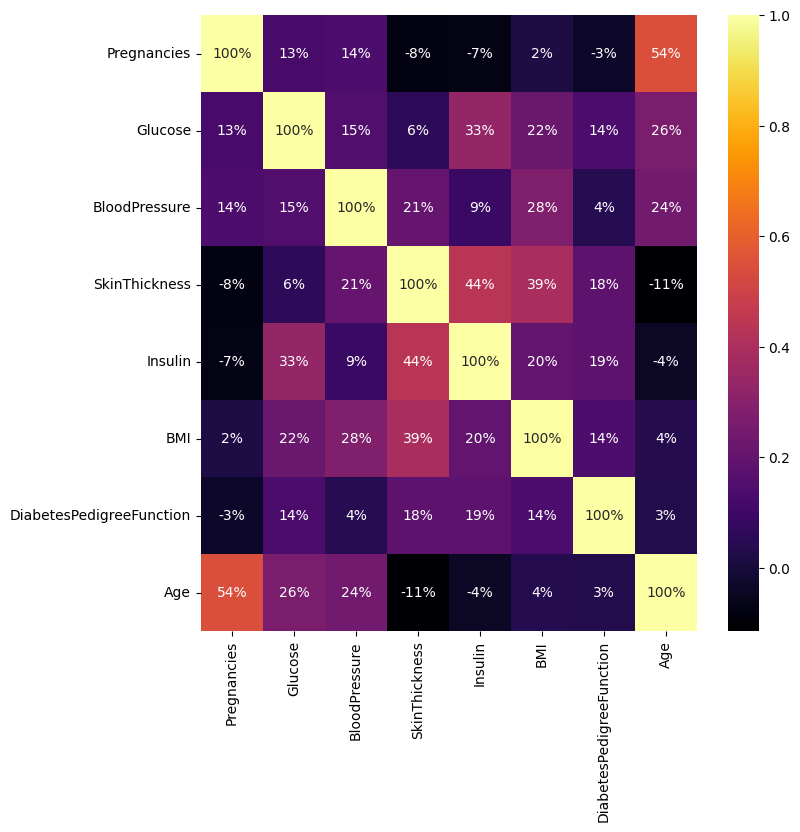

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,0:8].corr(), annot=True, fmt=".0%", cmap='inferno')

# Defining Feature and Target Sets

Extracting Features and Target Labels from the Diabets Dataset

In [15]:
X_feature = df.drop(columns='Outcome', axis=1) 
Y_target = df['Outcome'] 

In [16]:
X_feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
Y_target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Partitioning the Feature and Target Sets into Training and Testing Subsets with an 91-09 Ratio

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size=.15, random_state=110) 

In [19]:
print(X_feature.shape, X_train.shape, X_test.shape)

(768, 8) (652, 8) (116, 8)


# Logistic Regression

Initializing Logistic Regression Model

In [20]:
model1= LogisticRegression()

Training the Logistic Regression Model on the Training Data

In [21]:
model1 = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 or more
model1.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

 Calculating Training Accuracy

In [22]:
X_train_prediction = model1.predict(X_train) 
accuracy = accuracy_score(Y_train, X_train_prediction) 

In [23]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.69%


Calculating Testing Accuracy

In [24]:
X_test_prediction = model1.predict(X_test) 
Log_accuracy = accuracy_score(Y_test, X_test_prediction) 

In [25]:
print(f"Accuracy: {Log_accuracy * 100:.2f}%")

Accuracy: 84.48%


Predict on new Data 

In [26]:
import numpy as np
import warnings

# Ignore warnings for feature names
warnings.filterwarnings('ignore', message="X does not have valid feature names")

# Assuming you have a trained classifier 'clf' for diabetes prediction

# Input data for prediction (features relevant to diabetes prediction)
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)  # Example input data

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # 1 row and 8 columns (assuming 8 features)

# Predict using the classifier
prediction = model1.predict(input_data_reshaped)

# Output the prediction
if prediction[0] == 0:
    print('The person is predicted to have diabetes.')
else:
    print('The person is predicted not to have diabetes.')


The person is predicted not to have diabetes.


# Random Forest Classifier

Initializing Random Forest Classifier Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf2 = RandomForestClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=110)


Training Random Forest Classifier Model on the Training Data 

In [29]:
clf2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=110)

Calculating Training Accuracy 

In [30]:
X_train_prediction = clf2.predict(X_train)  
accuracy = accuracy_score(Y_train, X_train_prediction)

In [31]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.12%


Calculating Testing Accuracy

In [32]:
X_test_prediction = clf2.predict(X_test) # predict the target data using the test data 
Random_accuracy = accuracy_score(Y_test, X_test_prediction)

In [33]:
print(f"Accuracy: {Random_accuracy * 100:.2f}%")

Accuracy: 83.62%


Predict on new Data 

In [34]:
import numpy as np
import warnings

# Ignore warnings for feature names
warnings.filterwarnings('ignore', message="X does not have valid feature names")

# Assuming you have a trained classifier 'clf' for diabetes prediction

# Input data for prediction (features relevant to diabetes prediction)
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)  # Example input data

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # 1 row and 8 columns (assuming 8 features)

# Predict using the classifier
prediction = clf2.predict(input_data_reshaped)

# Output the prediction
if prediction[0] == 0:
    print('The person is predicted to have diabetes.')
else:
    print('The person is predicted not to have diabetes.')


The person is predicted not to have diabetes.


# XGBClassifier 

Initializing XGBClassifier Model

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
model = XGBClassifier(max_depth=4, min_child_weight=6, gamma=0.3, subsample=0.6, colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=0.5, learning_rate=0.1, n_estimators=100, random_state=110)



Training XGBClassifier Model on the training Data 

In [37]:
model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=110, ...)

Calculating Training Accuracy

In [38]:
Y_pred = model.predict(X_train)
accuracy = accuracy_score(Y_train, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.66%


Calculating Testing Accuracy

In [39]:
Y_pred = model.predict(X_test)
xgboost_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {xgboost_accuracy * 100:.2f}%")

Accuracy: 79.31%


Predict on new Data 

In [40]:
import numpy as np
import warnings

# Ignore warnings for feature names
warnings.filterwarnings('ignore', message="X does not have valid feature names")

# Assuming you have a trained classifier 'clf' for diabetes prediction

# Input data for prediction (features relevant to diabetes prediction)
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)  # Example input data

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # 1 row and 8 columns (assuming 8 features)

# Predict using the classifier
prediction = model.predict(input_data_reshaped)

# Output the prediction
if prediction[0] == 0:
    print('The person is predicted to have diabetes.')
else:
    print('The person is predicted not to have diabetes.')


The person is predicted not to have diabetes.


# Support Vector Machines

Initializing SVM Model 

In [41]:
from sklearn import svm 

In [42]:
clf = svm.SVC() 


Training SVM Model on the training data

In [43]:
clf.fit(X_train, Y_train)

SVC()

Calculating Training Accuracy 

In [44]:
X_prediction = clf.predict(X_train) 
accuracy = accuracy_score(Y_train, X_prediction) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.77%


Calculating Testing Accuracy

In [45]:
X_test_prediction = clf.predict(X_test) 
SVM_accuracy = accuracy_score(Y_test, X_test_prediction) 

In [46]:
print(f"Accuracy: {SVM_accuracy * 100:.2f}%")

Accuracy: 80.17%


Predict on new Data 

In [47]:
import numpy as np
import warnings

# Ignore warnings for feature names
warnings.filterwarnings('ignore', message="X does not have valid feature names")

# Assuming you have a trained classifier 'clf' for diabetes prediction

# Input data for prediction (features relevant to diabetes prediction)
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)  # Example input data

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # 1 row and 8 columns (assuming 8 features)

# Predict using the classifier
prediction = clf.predict(input_data_reshaped)

# Output the prediction
if prediction[0] == 0:
    print('The person is predicted to have diabetes.')
else:
    print('The person is predicted not to have diabetes.')


The person is predicted not to have diabetes.


# Model Ranking

In [48]:
model_scores = {
    "Logistic Regression": round( Log_accuracy * 100, 2),
    "Decision Tree Classifier": round( Random_accuracy* 100, 2),
    "Random Forest Classifier":  round( xgboost_accuracy* 100, 2), 
    "Gradient Boosting Classifier": round( SVM_accuracy* 100, 2)
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Logistic Regression: 84.48
2. Decision Tree Classifier: 83.62
3. Gradient Boosting Classifier: 80.17
4. Random Forest Classifier: 79.31


# Serializating the logistic regression model 

In [49]:
from joblib import dump 

In [50]:
dump(model1, 'logistic_regression.pkl') 


['logistic_regression.pkl']

In [51]:
dump(clf2, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

In [52]:
dump(model,'XGBClassifier.pkl')

['XGBClassifier.pkl']

In [53]:
dump(clf, 'SVM.pkl')

['SVM.pkl']